In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
df = pd.read_csv("merged_sites_with_traffic.csv")

In [3]:
df.shape

(536, 15)

In [4]:
df.columns

Index(['full_site_address', 'Latitude', 'Longitude', 'cars_washed',
       'nearby_traffic_lights_count', 'distance_nearest_traffic_light_1',
       'distance_nearest_traffic_light_2', 'distance_nearest_traffic_light_3',
       'distance_nearest_traffic_light_4', 'distance_nearest_traffic_light_5',
       'distance_nearest_traffic_light_6', 'distance_nearest_traffic_light_7',
       'distance_nearest_traffic_light_8', 'distance_nearest_traffic_light_9',
       'distance_nearest_traffic_light_10'],
      dtype='object')

In [5]:
df.head()

,full_site_address,Latitude,Longitude,cars_washed,nearby_traffic_lights_count,distance_nearest_traffic_light_1,distance_nearest_traffic_light_2,distance_nearest_traffic_light_3,distance_nearest_traffic_light_4,distance_nearest_traffic_light_5,distance_nearest_traffic_light_6,distance_nearest_traffic_light_7,distance_nearest_traffic_light_8,distance_nearest_traffic_light_9,distance_nearest_traffic_light_10
0,"*** StoneWash *** Car Care Center , 818 Paris ...",36.732531,-88.633032,36381,9.0,0.150351,0.169994,0.491303,0.557828,0.626811,0.636804,0.665593,0.695958,0.709589,NaN
1,"A-KEY CAR WASH , 2210 N Prince St , Clovis , N...",34.421150,-103.196969,95400,12.0,0.128615,0.200675,0.216605,0.383708,0.495596,0.632479,0.740138,0.792531,0.841610,0.879445
2,"ALL STAR CAR WASH , 5835 N Market St , Shrevep...",32.600345,-93.841208,10751,4.0,0.128080,0.162599,0.544057,0.682147,NaN,NaN,NaN,NaN,NaN,NaN
3,"Abercorn , 10509 Abercorn St , Savannah , GA ,...",31.985852,-81.133095,12326,12.0,0.144588,0.252166,0.264038,0.301289,0.430828,0.514370,0.551195,0.665801,0.721320,0.875274
4,"Alabaster Wash and Wax , 916 1st St S , Alabas...",33.233145,-86.811630,32263,6.0,0.221173,0.328031,0.432447,0.510083,0.559927,0.715462,NaN,NaN,NaN,NaN


In [6]:
# 1. Drop the address + lat/lon columns
df_model = df.drop(columns=['full_site_address','Latitude','Longitude'])


In [41]:

# 2. Split into X / y
X = df_model[[
    # 'nearby_traffic_lights_count', 
              'distance_nearest_traffic_light_2'
            ]]
y = df_model['cars_washed']


In [42]:
X = X.copy()
X['distance_nearest_traffic_light_2'] = X['distance_nearest_traffic_light_2'].fillna(10)


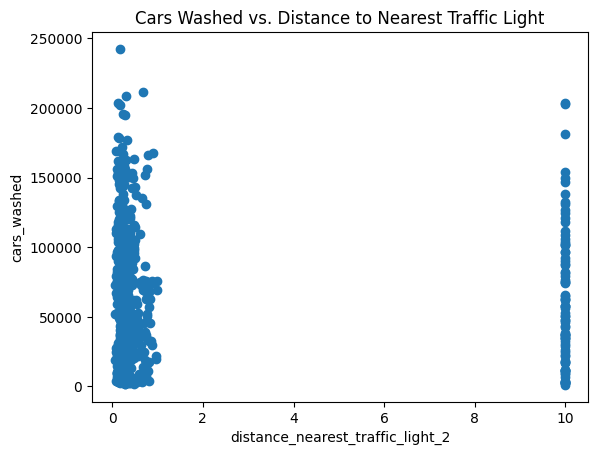

In [43]:
import matplotlib.pyplot as plt

# Feature 1 vs target
# plt.figure()
# plt.scatter(X['nearby_traffic_lights_count'], df_model['cars_washed'])
# plt.xlabel('nearby_traffic_lights_count')
# plt.ylabel('cars_washed')
# plt.title('Cars Washed vs. Nearby Traffic Lights Count')
# plt.show()

# Feature 2 vs target
plt.figure()
plt.scatter(X['distance_nearest_traffic_light_2'], df_model['cars_washed'])
plt.xlabel('distance_nearest_traffic_light_2')
plt.ylabel('cars_washed')
plt.title('Cars Washed vs. Distance to Nearest Traffic Light')
plt.show()

In [44]:

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:

# 4. Fit a model (e.g. random forest regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [46]:

# 5. Predict on test set
y_pred = model.predict(X_test)


In [47]:

# 6. Compute “accuracy” as % of predictions within ±15% of true value
tol = 0.15
within_tol = np.abs(y_pred - y_test) <= tol * np.abs(y_test)
accuracy = within_tol.mean()

print(f"Coverage within ±15%: {accuracy:.2%}")

Coverage within ±15%: 14.81%
